In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

If we want to sample from a Normal distribution, we do the following: 
(`loc` is the mean, `scale` is the standard deviation, while `size` is the sample size)

In [38]:
X = np.random.normal(loc=0,scale=1,size=10000)

We end up with a numpy array of samples:

In [39]:
X

array([ 1.00705009, -0.27207608,  0.1461078 , ..., -1.43328397,
       -1.58174376, -0.25952026])

We can plot a histogram like this:

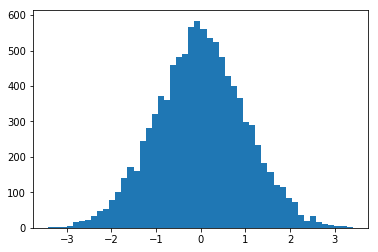

In [40]:
plt.hist(X,bins=50)
plt.show()

Ok, what about the Chi square distribution? Well, suppose that `X` is a number of samples that you've taken in real life. For example, maybe we drop a ball from a window 5 times, and measure how far it is from some target, and our measurements are:

In [61]:
X = np.random.normal(loc=0,scale=1,size=5)
X

array([-0.98007109,  2.46507304,  1.02455257,  1.78440296,  0.15960059])

Now we want to compute the variance (square of the standard deviation) of `X` from 0, to do this, we square the values and take the average:

In [62]:
Est_Variance = (X**2).sum()/5
Est_Variance

2.2592797338960162

Notice that we get a single number: we need to drop the ball 10 times to get single estimate of the variance. But if we really care about an accurate estimate of the variance, we need to measure it multiple times. Let's repeat our experiment a whole bunch of times (using a for loop): each time, we drop the ball 10 times, and compute the variance:

In [63]:
Variance_samples = []
df = 5
for i in range(10000):
    X = np.random.normal(loc=0,scale=1,size=df)
    Y = (X**2).sum()/df
    Variance_samples.append(Y)

Let's look at the corresponding histogram:

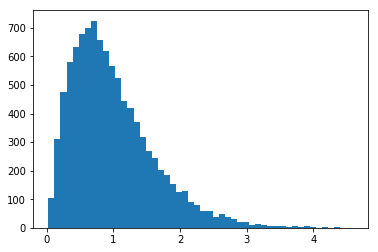

In [64]:
plt.hist(Variance_samples,bins=50)
plt.show()

Notice that this peaks near 1, (so that's the best point estimate of our variance), but we get quite a spread in general. It's not a normal distribution, though: it's lopsided for one thing, spreading out far more to the right than the left. What distribution is it? In fact, it's the chi square with 5 degrees of freedom (`df=5`), corresponding to the fact that we dropped the ball 5 times for each estimate of the variance.
Let's take a look at that:

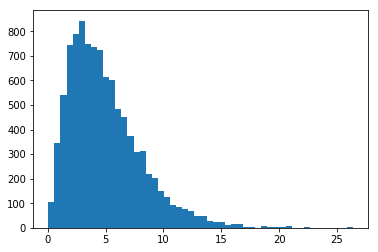

In [65]:
Chi_samples = np.random.chisquare(df=5,size=10000)
plt.hist(Chi_samples,bins=50)
plt.show()

Ok, these two pictures look very similar, except for the numbers on the x axis, which are off by a factor of 5. This corresponds to the fact that after squaring our original measurements (`X`) and summing them, we then divided the sum by 5. Let's divide our Chi square samples by 5 to account for that:

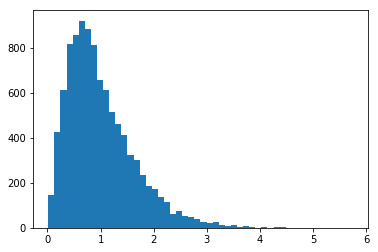

In [66]:
df=5.
Chi_samples_over_df = np.random.chisquare(df=df,size=10000)/df
plt.hist(Chi_samples_over_df,bins=50)
plt.show()

It looks almost exactly the same...

Now, why don't we experiment some more: drop the ball 100 times before making an estimate of the variance:

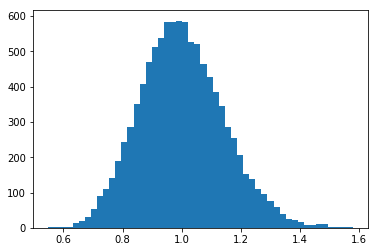

In [67]:
Variance_samples = []
df = 100
for i in range(10000):
    X = np.random.normal(loc=0,scale=1,size=df)
    Y = (X**2).sum()/df
    Variance_samples.append(Y)

plt.hist(Variance_samples, bins = 50)
plt.show()

Compare that with the corresponding samples from the Chi square:

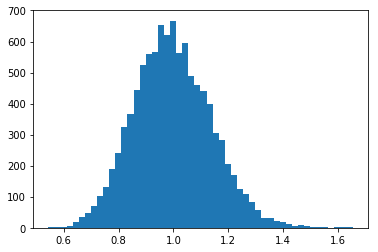

In [68]:
df=100.
Chi_samples_over_df = np.random.chisquare(df=df,size=10000)/df
plt.hist(Chi_samples_over_df,bins=50)
plt.show()